In [726]:
## IMPORTS

# BASE
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# SKLEARN
# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [727]:
## CHARTS

def plot_sales(dataframe, title, ylabel, xlabel, color='red'):
    
    plt.figure(figsize=(15, 3))
    plt.title(title)
    plt.ylabel(ylabel, color='white')
    # format y axis as currency
    # plt.gca().yaxis.set_major_formatter('R${:,.0f}'.format)

    plt.xlabel(xlabel, color='white')

    plt.bar(dataframe.index, dataframe['Total Sales'])
    # plot mean price in 2nd y axis
    plt.twinx()
    plt.ylabel('Mean Price', color='white')
    # plt.gca().yaxis.set_major_formatter('R${:,.0f}'.format)

    plt.plot(dataframe.index, dataframe['Mean Price'], color=color, linewidth=4)
    plt.show()

In [728]:
## MODELS

def fit_models(X_train, y_train, X_test, y_test):
    models = {'Linear Regression': LinearRegression(),
              'Decision Tree': DecisionTreeRegressor(),
              'Random Forest': RandomForestRegressor(),
              'Gradient Boosting': GradientBoostingRegressor()}

    models_df = pd.DataFrame(columns=['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
                             index=['R2', 'RMSE', 'MAE'])

    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        r2 = r2_score(y_test, pred)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        mae = mean_absolute_error(y_test, pred)
        
        models_df[name] = [r2, rmse, mae]

    return models_df, models # returns df with models performance and models dict

In [729]:
## OPEN FILE

lots = pd.read_csv('../clean-files/catalogo_artworks_info.csv', index_col=0)
lots.drop(columns=['Error', '0', '0.1', '0.2', '0.3', '0.4'], inplace=True)

print('Lots count:', lots.shape[0])
print('Lots columns:', lots.columns)

Lots count: 8304
Lots columns: Index(['artist_link', 'Descrição', 'Fonte de Pesquisa', 'Data da Pesquisa',
       'Type', 'Século', 'Artist', 'Título', 'url', 'Década', 'img_url',
       'Medium', 'Height (cm)', 'Width (cm)', 'Area (cm²)', 'Price (BRL)',
       'Price (USD)', 'Medium_type', 'Sold', 'Year of sale'],
      dtype='object')


In [730]:
## SELECT ARTISTS

catalogo_artists = [
    'José Pancetti - Giuseppe Gianinni Pancetti - Jose Pancetti',
    'Candido Portinari (1903-1962)',
    'Di Cavalcanti (1897-1976)',
    'Alberto Guignard - Alberto da Veiga Guignard',
    'Antônio Bandeira (1922-1967)',
    'Ismael Nery',
    'Tarsila do Amaral',
    'Maria Martins',
    'Maria Leontina Franco Da Costa',
    'Djanira da Motta e Silva',
    'Ibere Camargo - Iberê Camargo',
    'Milton Dacosta',
    'Cildo Meireles (1948)',
    'Helio Oiticica - Hélio Oiticica',
    'Annita Catarina Malfatti - Anita Malfatti - Anita Malfati',
]

lots = lots[lots['Artist'].isin(catalogo_artists)]

In [731]:
# SOLD LOTS
sold_lots = lots[lots['Sold'] == True]
print('Sold lots: ', len(sold_lots))

Sold lots:  3496


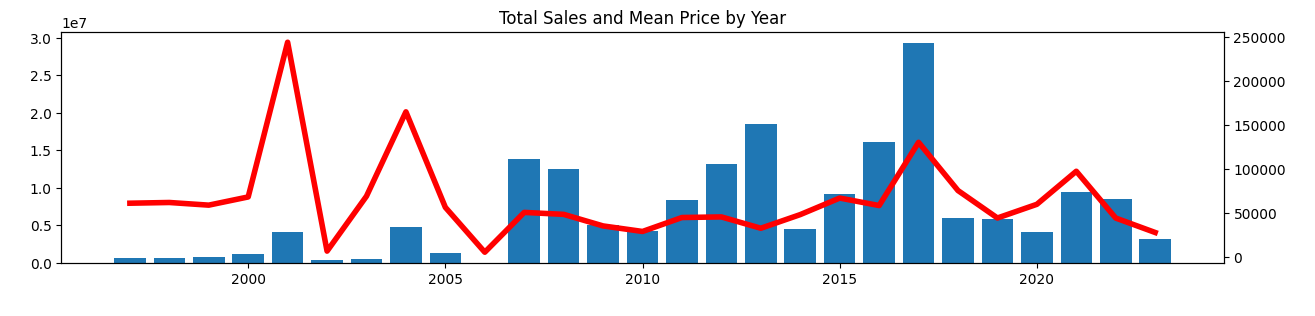

In [732]:
# PLOT TOTAL SALES AND MEAN PRICE BY YEAR
sales = pd.DataFrame(sold_lots.groupby('Year of sale')['Price (BRL)'].sum())
sales['Total Sales'] = sold_lots.groupby('Year of sale')['Price (BRL)'].sum()
sales['Mean Price'] = sold_lots.groupby('Year of sale')['Price (BRL)'].mean()

plot_sales(sales, 'Total Sales and Mean Price by Year', 'Total Sales', 'Year')

In [733]:
# TOP ARTISTS BY SALES COUNT

# dataframe with 2 columns: #sales, total sales ($) and mean price ($)
top_artists = pd.DataFrame(sold_lots['Artist'].value_counts())
top_artists['Total Sales'] = sold_lots.groupby('Artist')['Price (BRL)'].sum()
top_artists['Mean Price'] = sold_lots.groupby('Artist')['Price (BRL)'].mean()
# include mean area
top_artists['Mean Area'] = sold_lots.groupby('Artist')['Area (cm²)'].mean()
# mean price per area
top_artists['Mean Price per Area'] = top_artists['Mean Price'] / top_artists['Mean Area']

top_artists = top_artists.sort_values(by='Total Sales', ascending=False)
top_artists.drop('Mean Area', axis=1, inplace=True)
top_artists.head()

,count,Total Sales,Mean Price,Mean Price per Area
Artist,,,,
Candido Portinari (1903-1962),464,38218607.0,82367.687500,71.695445
José Pancetti - Giuseppe Gianinni Pancetti - Jose Pancetti,193,26843320.0,139084.559585,98.414395
Alberto Guignard - Alberto da Veiga Guignard,170,24301445.0,142949.676471,54.348199
Di Cavalcanti (1897-1976),336,18826915.0,56032.485119,21.080119
Antônio Bandeira (1922-1967),291,17487195.0,60093.453608,42.572004


In [734]:
## ARTISTS DATAFRAMES

artists = sold_lots.groupby('Artist').apply(lambda x: x.sort_values('Price (BRL)', ascending=False)).reset_index(drop=True).groupby('Artist')

artists_dataframes = {}
for artist in artists:
    artist_name = artist[0]
    artist_df = artist[1]
    artists_dataframes[artist_name] = artist_df

Found 464 lots for Candido Portinari (1903-1962)


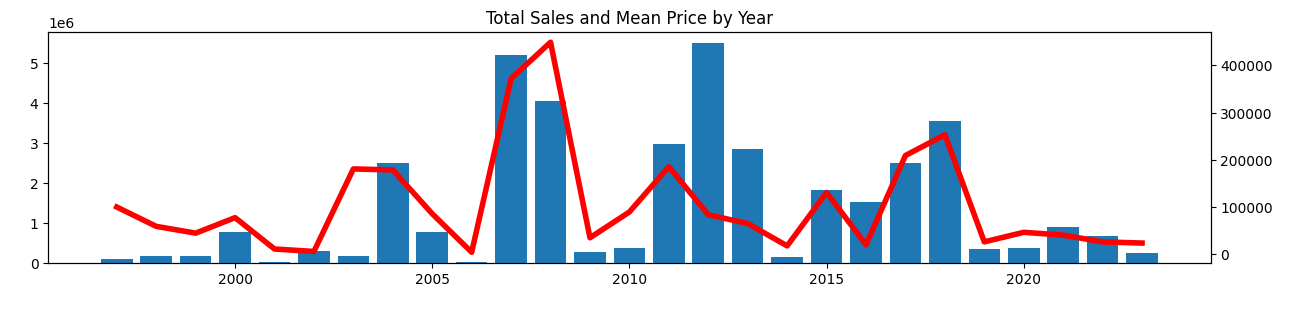

In [735]:
artist_name = 'Candido Portinari (1903-1962)'
artist_df = artists_dataframes[artist_name]

# PLOT TOTAL SALES AND MEAN PRICE BY YEAR
artist_sales = pd.DataFrame(artist_df.groupby('Year of sale')['Price (BRL)'].sum())
artist_sales['Total Sales'] = artist_df.groupby('Year of sale')['Price (BRL)'].sum()
artist_sales['Mean Price'] = artist_df.groupby('Year of sale')['Price (BRL)'].mean()

print(f'Found {artist_df.shape[0]} lots for {artist_name}')
plot_sales(artist_sales, 'Total Sales and Mean Price by Year', 'Total Sales', 'Year')

In [736]:
# lots = lots[lots['Medium_type'] == 'pintura'] ## ONLY PAINTING

In [737]:
## MODELS

def fit_models(X_train, y_train, X_test, y_test):
    models = {'Linear Regression': LinearRegression(),
              'Decision Tree': DecisionTreeRegressor(),
              'Random Forest': RandomForestRegressor(n_estimators=10, min_samples_leaf=2, min_samples_split=4),
              'Gradient Boosting': GradientBoostingRegressor()}

    models_df = pd.DataFrame(columns=['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
                             index=['RMSE', 'MAE'])

    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        mae = mean_absolute_error(y_test, pred)
        
        models_df[name] = [rmse, mae]

    return models_df, models # returns df with models performance and models dict

In [738]:
## FILL MISSING VALUES IN 'Year' COLUMN

# # print count of lots that dont have a value for 'Year
# year_missing = lots[lots['Ano'].isna()]
# print('Lots without year:', year_missing.shape[0])
# # lots without year but with década
# print('Lots with século:', year_missing[year_missing['Década'].notna()].shape[0])

In [739]:
## FIT PRICE MODELS

# hide all warnings
import warnings
warnings.filterwarnings('ignore')

lots_to_model = lots[['Artist', 'Width (cm)', 'Height (cm)', 'Year of sale', 'Price (BRL)', 'Medium_type', 'Area (cm²)']]#, 'Year']]
lots_to_model.dropna(subset=['Artist', 'Width (cm)', 'Height (cm)', 'Year of sale', 'Price (BRL)', 'Medium_type', 'Area (cm²)'], inplace=True)
# lots_to_model.fillna(value=1970, inplace=True) # fill NaN year with 1970

print('shape of lots_to_model (before split):', str(lots_to_model.shape))

X = lots_to_model.drop(['Price (BRL)'], axis=1)
y = lots_to_model['Price (BRL)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = pd.get_dummies(X_train, columns=['Artist', 'Medium_type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Artist', 'Medium_type'], drop_first=True)

print('model features:', len(X_train.columns))

# add to X_test all columns that are in X_train but not in X_test
for column in X_train.columns:
    if column not in X_test.columns:
        X_test[column] = 0

# remove from x_test all columns that are in X_test but not in X_train
for column in X_test.columns:
    if column not in X_train.columns:
        X_test.drop(column, axis=1, inplace=True)

# sort columns alphabetically
X_train = X_train.reindex(sorted(X_train.columns), axis=1)
X_test = X_test.reindex(sorted(X_test.columns), axis=1)

models_df, models = fit_models(X_train, y_train, X_test, y_test)

models_df

shape of lots_to_model (before split): (7851, 7)
model features: 21


,Linear Regression,Decision Tree,Random Forest,Gradient Boosting
RMSE,486966.358552,180741.298137,156779.516022,158082.606593
MAE,232009.361145,31334.344419,32575.862115,53914.643318


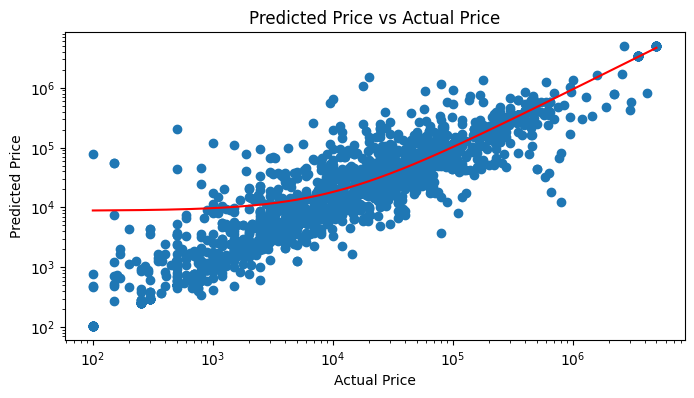

In [740]:
## COMPARE MODEL PERFORMANCE ACROSS MEDIUM TYPES
# add predicted_price column to lots_to_model
lots_copy = X_test.copy()
lots_copy['Predicted Price'] = models['Random Forest'].predict(X_test)
lots_copy['Actual Price'] = y_test
lots_copy['Error'] = lots_copy['Predicted Price'] - lots_copy['Actual Price']
lots_copy['Error %'] = lots_copy['Error'] / lots_copy['Actual Price'] - 1

# scatter plot: predicted price vs actual price
plt.figure(figsize=(8,4))
plt.title('Predicted Price vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
# format axes: separate thousands with comma and format as currency
plt.gca().xaxis.set_major_formatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.xscale('log')
plt.yscale('log')
plt.scatter(lots_copy['Actual Price'], lots_copy['Predicted Price'])
# include trend line
plt.plot(np.unique(lots_copy['Actual Price']), np.poly1d(np.polyfit(lots_copy['Actual Price'], lots_copy['Predicted Price'], 1))(np.unique(lots_copy['Actual Price'])), color='red')
plt.show()

In [741]:
lots_to_model['Medium_type'].value_counts()

Medium_type
pintura       3801
desenho       1882
reprodução    1635
outro          533
Name: count, dtype: int64

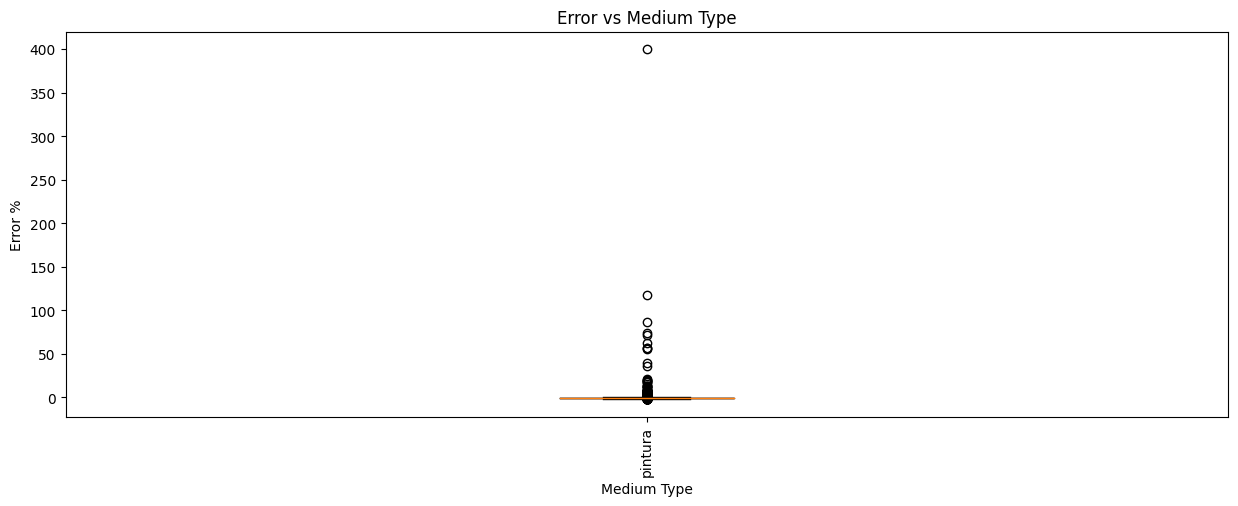

In [742]:
## ERROR ACROSS MEDIUM TYPES

medium_types = ['pintura']# , 'desenho', 'reprodução']

## Compare pct error across medium types
# boxplot: error vs medium type
plt.figure(figsize=(15, 5))
plt.title('Error vs Medium Type')
plt.xlabel('Medium Type')
plt.ylabel('Error %')
plt.xticks(rotation=90)
plt.boxplot([
             lots_copy[lots_copy['Medium_type_pintura'] == 1]['Error %']],
             labels=medium_types)
plt.show()

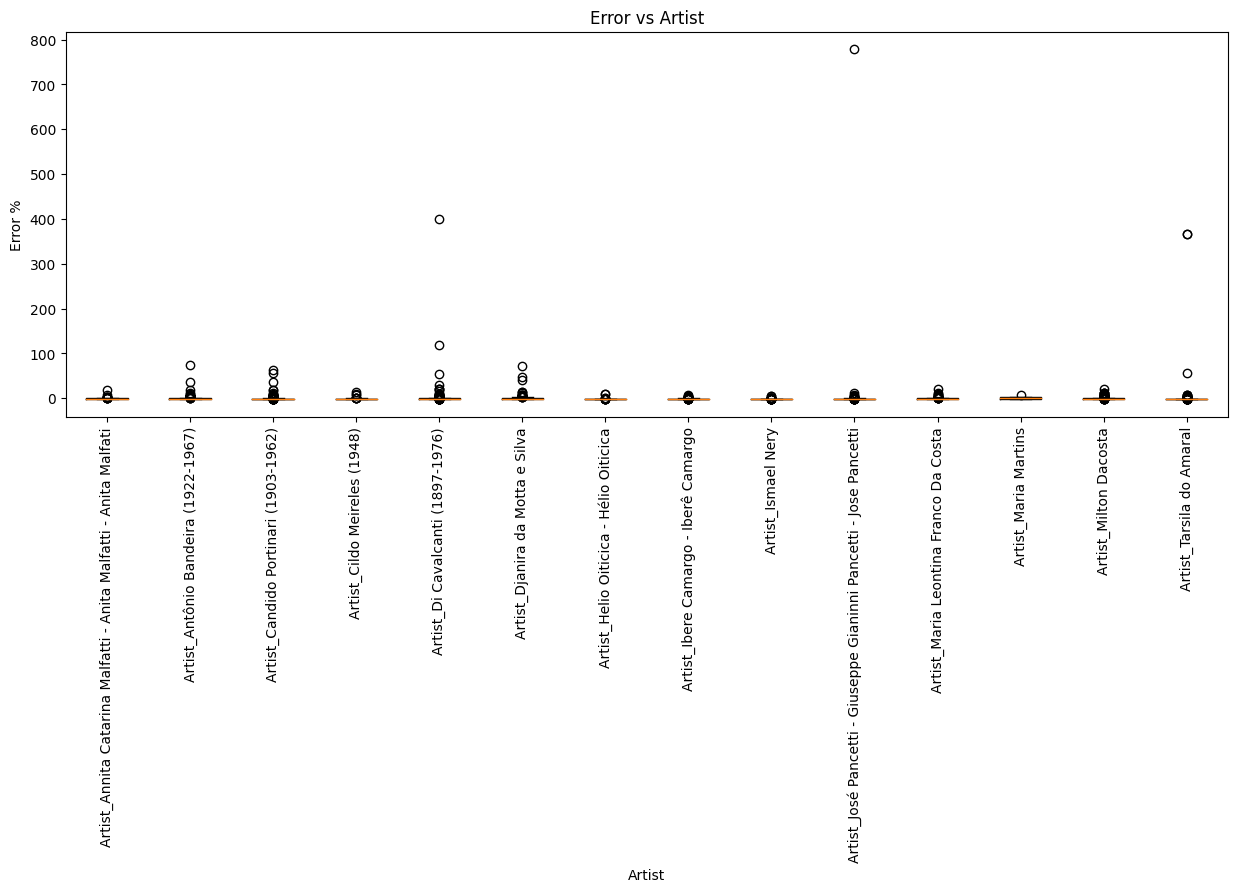

In [743]:
## COMPARE PCT ERROR ACROSS ARTISTS
artists = lots_copy.columns[1:-10]

# boxplot: error vs artist
plt.figure(figsize=(15, 5))
plt.title('Error vs Artist')
plt.xlabel('Artist')
plt.ylabel('Error %')
plt.xticks(rotation=90)
plt.boxplot([lots_copy[lots_copy[artist] == 1]['Error %'] for artist in artists], labels=artists)
plt.show()

In [744]:
# show 10 biggest errors
lots_copy.sort_values('Error %', ascending=False).head(10)

,Area (cm²),Artist_Annita Catarina Malfatti - Anita Malfatti - Anita Malfati,Artist_Antônio Bandeira (1922-1967),Artist_Candido Portinari (1903-1962),Artist_Cildo Meireles (1948),Artist_Di Cavalcanti (1897-1976),Artist_Djanira da Motta e Silva,Artist_Helio Oiticica - Hélio Oiticica,Artist_Ibere Camargo - Iberê Camargo,Artist_Ismael Nery,...,Height (cm),Medium_type_outro,Medium_type_pintura,Medium_type_reprodução,Width (cm),Year of sale,Predicted Price,Actual Price,Error,Error %
Year,,,,,,,,,,,,,,,,,,,,,
NaN,2990.0,False,False,False,False,False,False,False,False,False,...,65.0,True,False,False,46.0,2018,7.807483e+04,100.0,7.797483e+04,778.748333
1973.0,2475.0,False,False,False,False,True,False,False,False,False,...,45.0,False,True,False,55.0,2013,2.010917e+05,500.0,2.005917e+05,400.183333
NaN,1344.0,False,False,False,False,False,False,False,False,False,...,32.0,True,False,False,42.0,2018,5.534125e+04,150.0,5.519125e+04,366.941667
NaN,1344.0,False,False,False,False,False,False,False,False,False,...,32.0,True,False,False,42.0,2018,5.534125e+04,150.0,5.519125e+04,366.941667
NaN,980.0,False,False,False,False,True,False,False,False,False,...,28.0,False,True,False,35.0,2012,1.198300e+05,1000.0,1.188300e+05,117.830000
NaN,748.0,False,False,False,False,False,False,False,False,False,...,34.0,False,True,False,22.0,2013,4.445333e+04,500.0,4.395333e+04,86.906667
NaN,7872.0,False,True,False,False,False,False,False,False,False,...,82.0,False,True,False,96.0,2022,1.512633e+06,20000.0,1.492633e+06,73.631667
NaN,874.0,False,False,False,False,False,True,False,False,False,...,19.0,False,True,False,46.0,2019,1.104943e+05,1500.0,1.089943e+05,71.662889
1942.0,2025.0,False,False,True,False,False,False,False,False,False,...,45.0,False,True,False,45.0,2008,6.471700e+05,10000.0,6.371700e+05,62.717000


In [745]:
## SAVE LOCALLY MODEL AND X_TEST

# save model to models folder
model = models['Random Forest']
with open('./models/catalogo_rf_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# save X_test as csv
X_test.to_csv('./models/catalogo_X_test.csv', index=False)